In [1]:
#Домашнее задание №1
import cv2

img=cv2.imread('D:/Python_4_course/Images/Meme.jpg')
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgYCrCb=cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
imgHLS=cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
cv2.imshow('Skelet',imgGray)
#cv2.imshow('Skelet',imgYCrCb)
#cv2.imshow('Skelet',imgHLS)
cv2.waitKey(0)
cv2.destroyAllWindows()

#cv2.imwrite('Images/Gray.png',imgGray)
#cv2.imwrite('Images/YCrCb.png',imgYCrCb)
#cv2.imwrite('Images/HLS.png',imgHLS)

True

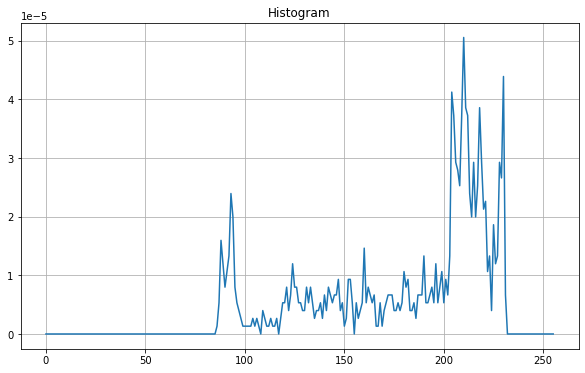

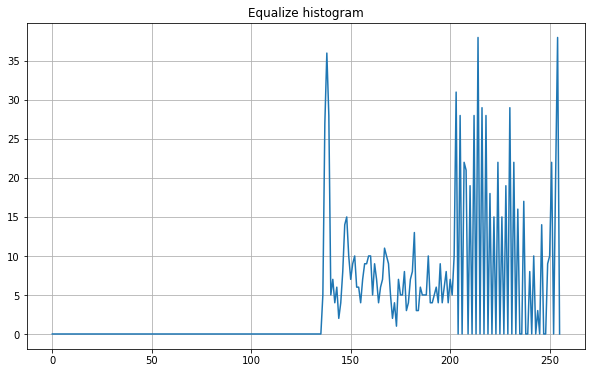

In [131]:
### Домашнее задание №2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#Read image
img=cv2.imread('Images/Ravens.jpg')
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Create spectrum of image
spectrum=np.fft.fft2(imgGray)
spectrum=np.fft.fftshift(spectrum)
spectrum=np.log(abs(spectrum))
spectrum=(spectrum-spectrum.min())/(spectrum.max())

#Create histogram
WH=imgGray.size
hist=cv2.calcHist(imgGray,[0],None,[256],(0,256))/WH
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(hist)
ax.grid()
ax.set_title('Histogram')

#Equalize hist
Eq_hist=cv2.equalizeHist(imgGray)
eqhist=cv2.calcHist(Eq_hist,[0],None,[256],(0,256))
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(eqhist)
ax.grid()
ax.set_title('Equalize histogram')

#Salt and pepper
copy_image=imgGray.copy()
noised_image=salt_pepper(copy_image,2)

#Median blur
median_image=cv2.medianBlur(noised_image,3)

#Box filter
box_image=cv2.boxFilter(imgGray,0,(5,5))

#Laplacian
lap_image=imgGray.copy()-cv2.Laplacian(imgGray,0,(5,5))

#Show image
cv2.imshow('Image',box_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Images/box_image.png',box_image)

In [112]:
import random
def salt_pepper(image,percent):
    row,col=image.shape
    number_pixels=round(image.size*percent/100)
    for i in range(number_pixels):
        x_salt=random.randint(0,row-1)
        y_salt=random.randint(0,col-1)
        image[x_salt][y_salt]=255
        x_pepper=random.randint(0,row-1)
        y_pepper=random.randint(0,col-1)
        image[x_pepper][y_pepper]=0
    return image